In [1]:
!pip install pandasql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=5c30dc81bb26197f639e67b63200e6d99b3a7942b9235dd56a26a4c66de911f3
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [2]:
data = pd.read_csv('pizza_sales.csv')

In [3]:
data.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
data.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_details_id   48620 non-null  int64 
 1   order_id           48620 non-null  int64 
 2   pizza_id           48620 non-null  object
 3   quantity           48620 non-null  int64 
 4   order_date         48620 non-null  object
 5   order_time         48620 non-null  object
 6   unit_price         48620 non-null  object
 7   total_price        48620 non-null  object
 8   pizza_size         48620 non-null  object
 9   pizza_category     48620 non-null  object
 10  pizza_ingredients  48620 non-null  object
 11  pizza_name         48620 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [6]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [7]:
data.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
check_duplicate = data.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 0


In [9]:
data.isna().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


### Pizza Terlaris Berdasarkan Pendapatan
**Tujuan**: Mengidentifikasi pizza yang menghasilkan pendapatan terbesar untuk menentukan fokus bisnis.  
**Query SQL**: Mengelompokkan data berdasarkan `pizza_name` untuk menghitung total pendapatan (`total_price`) dan jumlah pesanan (`quantity`).

Top 5 Pizza Berdasarkan Pendapatan:
                     pizza_name  TotalRevenue  TotalQuantity
0        The Thai Chicken Pizza       41712.0           2371
1    The Barbecue Chicken Pizza       41004.0           2432
2  The California Chicken Pizza       39700.0           2370
3      The Classic Deluxe Pizza       37946.0           2453
4       The Spicy Italian Pizza       33628.0           1924


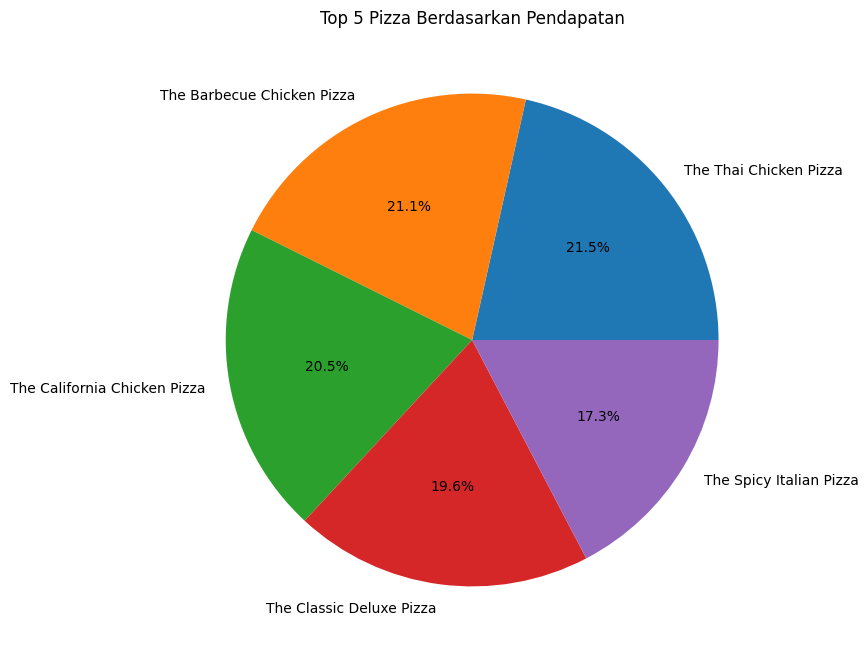

In [10]:
pysqldf = lambda q: sqldf(q, globals())
query = """
SELECT pizza_name,
       SUM(total_price) as TotalRevenue,
       SUM(quantity) as TotalQuantity
FROM data
GROUP BY pizza_name
ORDER BY TotalRevenue DESC
LIMIT 5
"""
top_pizzas = pysqldf(query)
print("Top 5 Pizza Berdasarkan Pendapatan:")
print(top_pizzas)

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(top_pizzas['TotalRevenue'], labels=top_pizzas['pizza_name'], autopct='%1.1f%%')
plt.title('Top 5 Pizza Berdasarkan Pendapatan')
plt.show()

**Insight**: Pizza seperti [The Thai Chicken Pizza] menyumbang pendapatan terbesar, menunjukkan popularitas tinggi. Pizza ini dapat diprioritaskan untuk promosi atau stok tambahan.

### Analisis Univariat: Distribusi Kategori Pizza
**Tujuan**: Memahami kategori pizza yang paling populer berdasarkan jumlah pesanan.  
**Query SQL**: Menghitung total kuantitas dan pendapatan per `pizza_category`.

Distribusi Kategori Pizza:
  pizza_category  TotalRevenue  TotalQuantity
0        Classic      216159.0          14888
1        Supreme      202078.0          11987
2         Veggie      189716.0          11649
3        Chicken      187867.0          11050


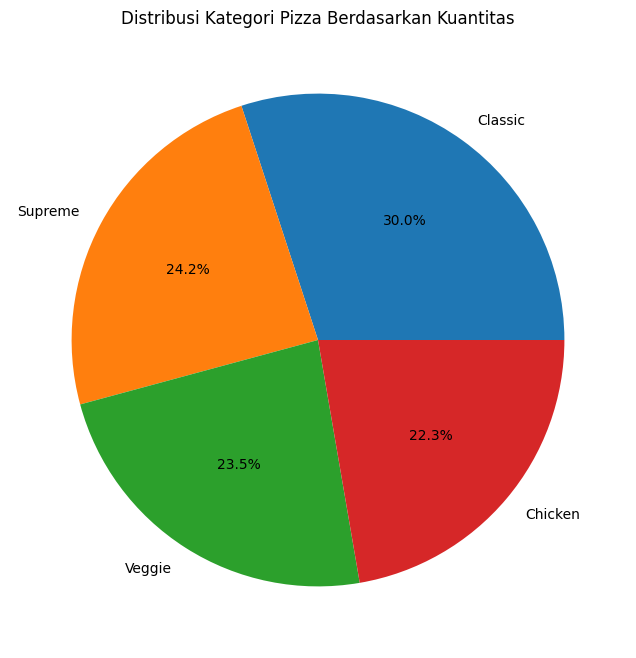

In [11]:
query = """
SELECT pizza_category,
       SUM(total_price) as TotalRevenue,
       SUM(quantity) as TotalQuantity
FROM data
GROUP BY pizza_category
ORDER BY TotalQuantity DESC
"""
category_sales = pysqldf(query)
print("Distribusi Kategori Pizza:")
print(category_sales)

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(category_sales['TotalQuantity'], labels=category_sales['pizza_category'], autopct='%1.1f%%')
plt.title('Distribusi Kategori Pizza Berdasarkan Kuantitas')
plt.show()

**Insight**: Kategori seperti [Classic] mendominasi pesanan, menunjukkan preferensi pelanggan yang dapat dioptimalkan untuk kampanye pemasaran.

### Tren Penjualan Bulanan
**Tujuan**: Mengidentifikasi pola musiman (misalnya, Harbolnas di November) untuk rekomendasi waktu promosi.  
**Query SQL**: Mengelompokkan data berdasarkan bulan untuk menghitung total pendapatan dan jumlah transaksi, fokus pada tahun 2015.

Penjualan Bulanan di 2015:
      Month  TotalRevenue  TotalTransactions
0   2015-01       67915.0               4156
1   2015-02       63380.0               3892
2   2015-03       68466.0               4186
3   2015-04       66902.0               4067
4   2015-05       69472.0               4239
5   2015-06       66407.0               4025
6   2015-07       70640.0               4301
7   2015-08       66446.0               4094
8   2015-09       62433.0               3819
9   2015-10       62301.0               3797
10  2015-11       68500.0               4185
11  2015-12       62958.0               3859


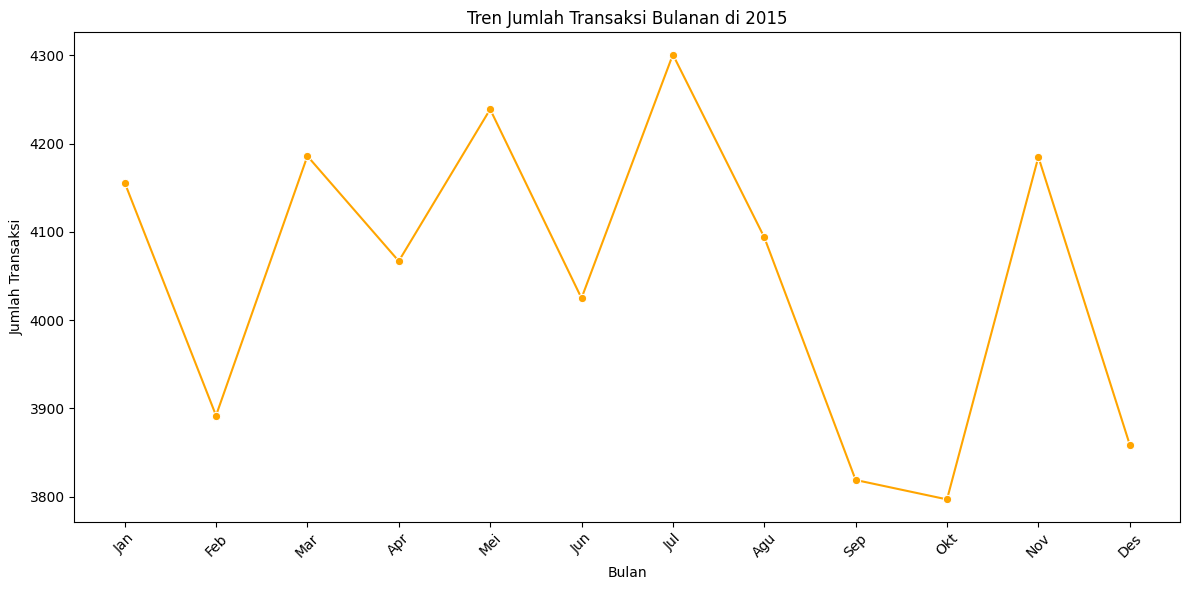

In [12]:
query = """
SELECT strftime('%Y-%m', order_date) as Month,
       SUM(total_price) as TotalRevenue,
       COUNT(order_id) as TotalTransactions
FROM data
WHERE strftime('%Y', order_date) = '2015'
GROUP BY strftime('%Y-%m', order_date)
ORDER BY Month
"""
monthly_sales_2015 = pysqldf(query)
print("Penjualan Bulanan di 2015:")
print(monthly_sales_2015)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalTransactions', data=monthly_sales_2015, marker='o', color='orange')
plt.title('Tren Jumlah Transaksi Bulanan di 2015')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Penjualan pizza tertinggi di 2015 terjadi pada Juli (4300) dan Mei (4239), terendah di Oktober (3719), dengan peningkatan di musim semi dan panas, lalu menurun di akhir tahun. Sarankan promosi paket musiman di musim panas dan varian hangat/diskon di musim lain.

### Hubungan Ukuran Pizza dan Pendapatan
**Tujuan**: Memahami bagaimana ukuran pizza memengaruhi pendapatan untuk strategi penetapan harga.  
**Query SQL**: Menghitung rata-rata harga dan total pendapatan per `pizza_size`.


Pendapatan dan Harga Rata-rata per Ukuran Pizza:
  pizza_size   AvgPrice  TotalRevenue
0          L  19.210083      364426.0
1          M  15.543256      243158.0
2          S  12.034732      173448.0
3         XL  25.000000       13808.0
4        XXL  35.000000         980.0


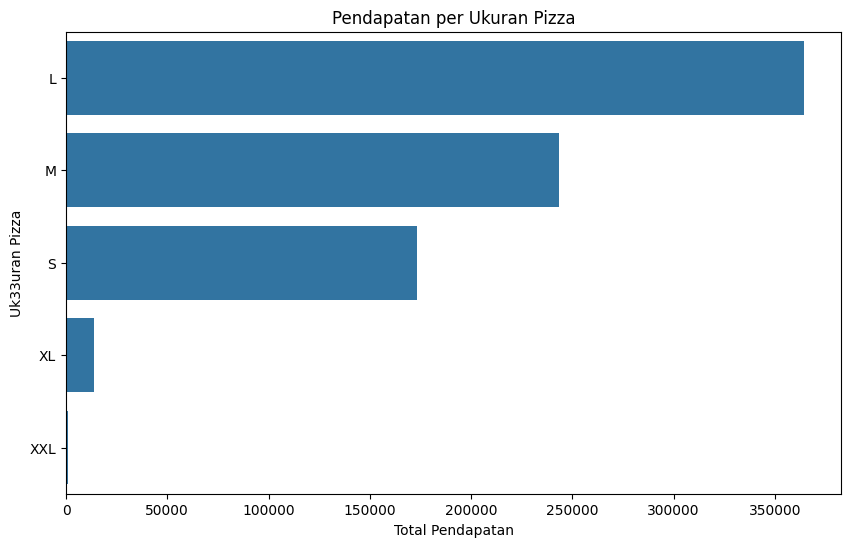

In [13]:
query = """
SELECT pizza_size,
       AVG(unit_price) as AvgPrice,
       SUM(total_price) as TotalRevenue
FROM data
GROUP BY pizza_size
ORDER BY TotalRevenue DESC
"""
size_sales = pysqldf(query)
print("Pendapatan dan Harga Rata-rata per Ukuran Pizza:")
print(size_sales)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='pizza_size', data=size_sales)
plt.title('Pendapatan per Ukuran Pizza')
plt.xlabel('Total Pendapatan')
plt.ylabel('Uk33uran Pizza')
plt.show()

**Insight**: Ukuran pizza seperti [L] menghasilkan pendapatan tertinggi, menunjukkan preferensi pelanggan untuk ukuran tertentu.

### Analisis Diskon: Pizza dengan Harga Rendah
**Tujuan**: Menganalisis apakah pizza dengan harga rendah mendorong lebih banyak transaksi.  
**Query SQL**: Mengidentifikasi pizza dengan harga di bawah rata-rata dan jumlah pesanan.

Pizza dengan Harga Rendah dan Jumlah Pesanan Tinggi:
                 pizza_name   AvgPrice  TotalQuantity
0  The Classic Deluxe Pizza  15.478477           2453
1        The Hawaiian Pizza  12.867089           2422
2       The Pepperoni Pizza  11.965808           2418
3        The Sicilian Pizza  15.713831           1938
4        The Big Meat Pizza  12.000000           1914


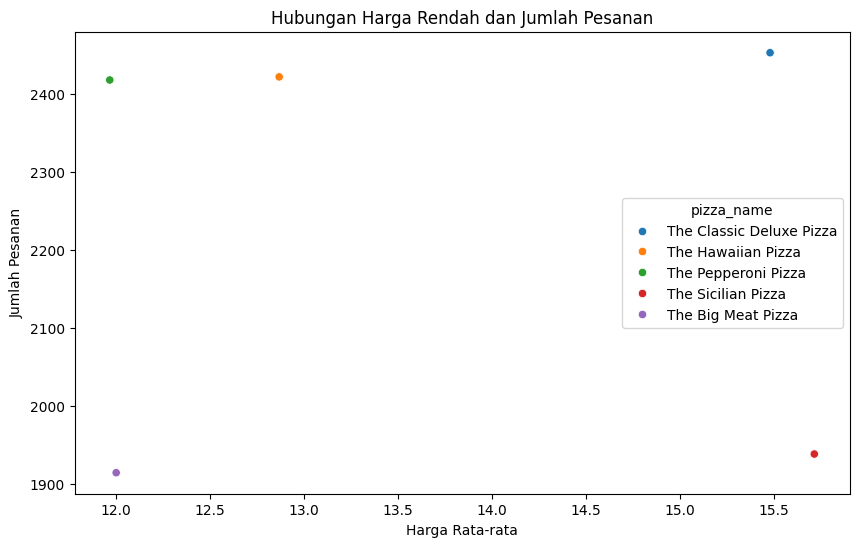

In [14]:
query = """
SELECT pizza_name,
       AVG(unit_price) as AvgPrice,
       SUM(quantity) as TotalQuantity
FROM data
GROUP BY pizza_name
HAVING AvgPrice < (SELECT AVG(unit_price) FROM data)
ORDER BY TotalQuantity DESC
LIMIT 5
"""
discount_pizzas = pysqldf(query)
print("Pizza dengan Harga Rendah dan Jumlah Pesanan Tinggi:")
print(discount_pizzas)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AvgPrice', y='TotalQuantity', hue='pizza_name', data=discount_pizzas)
plt.title('Hubungan Harga Rendah dan Jumlah Pesanan')
plt.xlabel('Harga Rata-rata')
plt.ylabel('Jumlah Pesanan')
plt.show()

**Insight**: Pizza terlaris didorong oleh dua faktor kunci: harga rendah (seperti The Hawaiian Pizza) dan persepsi nilai/kualitas tinggi pada harga premium (seperti The Classic Deluxe Pizza). Hal ini menunjukkan potensi strategi ganda: gunakan diskon pada pizza populer untuk meningkatkan volume transaksi, sambil menonjolkan kualitas pada pizza premium untuk memaksimalkan margin keuntungan.

## Kesimpulan dan Rekomendasi
Berdasarkan analisis:
- **Pizza Terlaris**: Pizza seperti [The Classic Deluxe Pizza] menyumbang pendapatan terbesar, cocok untuk fokus promosi.
- **Pola Musiman**: Penjualan pizza tertinggi di 2015 terjadi pada Juli (4300) dan Mei (4239), terendah di Oktober (3719), dengan peningkatan di musim semi dan panas, lalu menurun di akhir tahun. Sarankan promosi paket musiman di musim panas dan varian hangat/diskon di musim lain.
- **Kategori Populer**: Kategori seperti [Classic] mendominasi, dapat dioptimalkan untuk kampanye.
- **Ukuran Pizza**: Ukuran [L] menghasilkan pendapatan tinggi, cocok untuk strategi penetapan harga.
- **Strategi Diskon**: **Strategi Diskon dan Harga**: Pizza harga rendah (contoh: The Hawaiian Pizza) meningkatkan transaksi, terutama dengan diskon di bulan sepi (non-November). Pizza premium (contoh: The Classic Deluxe Pizza) unggul karena kualitas. Terapkan diskon pada pizza populer untuk volume transaksi dan tonjolkan kualitas pizza premium untuk margin keuntungan.